 # Table of Contents
<div class="toc" style="margin-top: 1em;"><ul class="toc-item" id="toc-level0"><ul class="toc-item"><li><span><a href="http://localhost:8888/notebooks/OneDrive/Documents/data_science_stuff/Personal_projects/ATF%20analysis/pca_tree_approach_possesor_age.ipynb#scatter-matrix-of-all-columns" data-toc-modified-id="scatter-matrix-of-all-columns-0.1">scatter matrix of all columns</a></span></li><li><span><a href="http://localhost:8888/notebooks/OneDrive/Documents/data_science_stuff/Personal_projects/ATF%20analysis/pca_tree_approach_possesor_age.ipynb#Correlation-matrix" data-toc-modified-id="Correlation-matrix-0.2">Correlation matrix</a></span></li><li><span><a href="http://localhost:8888/notebooks/OneDrive/Documents/data_science_stuff/Personal_projects/ATF%20analysis/pca_tree_approach_possesor_age.ipynb#eigenvalues-and-eigenvectors" data-toc-modified-id="eigenvalues-and-eigenvectors-0.3">eigenvalues and eigenvectors</a></span></li><li><span><a href="http://localhost:8888/notebooks/OneDrive/Documents/data_science_stuff/Personal_projects/ATF%20analysis/pca_tree_approach_possesor_age.ipynb#pca-and-principal-value-scatter-matrix" data-toc-modified-id="pca-and-principal-value-scatter-matrix-0.4">pca and principal value scatter matrix</a></span></li><li><span><a href="http://localhost:8888/notebooks/OneDrive/Documents/data_science_stuff/Personal_projects/ATF%20analysis/pca_tree_approach_possesor_age.ipynb#feature-engineering-last-column" data-toc-modified-id="feature-engineering-last-column-0.5">feature engineering last column</a></span></li><li><span><a href="http://localhost:8888/notebooks/OneDrive/Documents/data_science_stuff/Personal_projects/ATF%20analysis/pca_tree_approach_possesor_age.ipynb#Decision-tree-on-the-dataset" data-toc-modified-id="Decision-tree-on-the-dataset-0.6">Decision tree on the dataset</a></span></li></ul></ul></div>

In [1]:
import pandas as pd 
import numpy as np 


In [2]:
location ='C:/Users/Pawan/OneDrive/Documents/data_science_stuff/Personal_projects/datasets/ATF dataset/2016/possessorage_by_state_cy2016.xlsx'

In [3]:
possesor_dataset = pd.read_excel(location)

In [4]:
possesor_dataset.head()

,Firearms Recovered and Traced in the United States and Territories,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8
0,Age of Possessor,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,"January 1, 2016 - December 31, 2016",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,State/Territory,17 & Under,18 to 21,22 to 24,25 to 30,31 to 40,41 to 50,Over 50,Average Age
3,ALABAMA,79,406,394,725,693,359,381,34
4,ALASKA,12,60,87,146,209,179,89,36


In [5]:
actual_titles = possesor_dataset.iloc[2,:]
possesor_dataset= possesor_dataset.rename(index = str, columns = actual_titles)


In [6]:
possesor_dataset = possesor_dataset.drop([str(x) for x in list(range(3))])
possesor_dataset = possesor_dataset.drop([str(x) for x in list(range(57,66))])

possesor_dataset = possesor_dataset.drop (['Average Age'], axis=1)

In [7]:
possesor_dataset = possesor_dataset.drop(['State/Territory'], axis=1)

In [8]:
possesor_dataset = possesor_dataset.astype(np.uint8)


In [9]:
from pandas.plotting import scatter_matrix
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
import plotly.figure_factory as ff
scatter_matrix(possesor_dataset, figsize=(15,15))

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000002C5B7321240>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x000002C5B88F6780>]], dtype=object)

## scatter matrix of all columns 

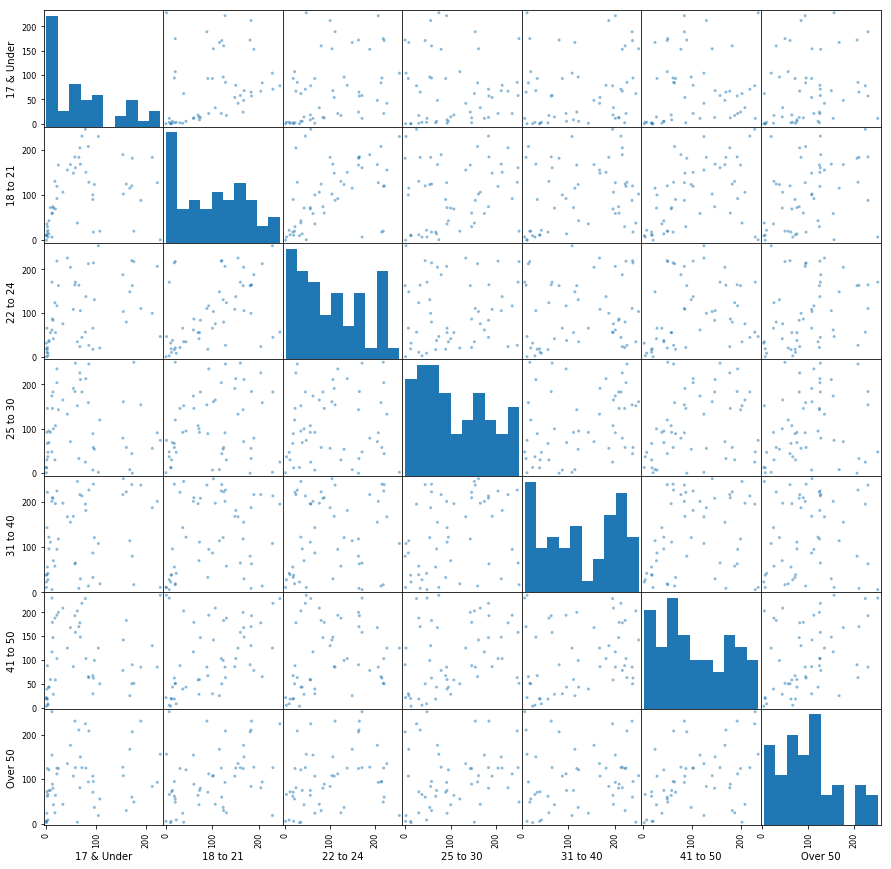

In [10]:
import matplotlib.pyplot as plt
plt.show()

## Correlation matrix 

In [11]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
possesor_dataset_scaled = pd.DataFrame(scaler.fit_transform(possesor_dataset), columns=possesor_dataset.columns)

In [12]:
correlation_matrix = possesor_dataset_scaled.corr()

In [13]:
correlation_matrix

,17 & Under,18 to 21,22 to 24,25 to 30,31 to 40,41 to 50,Over 50
17 & Under,1.000000,0.325693,0.393954,-0.039370,0.209315,0.128834,0.230451
18 to 21,0.325693,1.000000,0.488540,0.189408,0.278167,0.459614,0.380032
22 to 24,0.393954,0.488540,1.000000,0.097882,0.134295,0.234983,0.298355
25 to 30,-0.039370,0.189408,0.097882,1.000000,0.310144,0.316250,0.201623
31 to 40,0.209315,0.278167,0.134295,0.310144,1.000000,0.240075,0.099485
41 to 50,0.128834,0.459614,0.234983,0.316250,0.240075,1.000000,0.390706
Over 50,0.230451,0.380032,0.298355,0.201623,0.099485,0.390706,1.000000


## eigenvalues and eigenvectors 

In [14]:
# get eigenvalues and eigenvectors 
eig_vals, eig_vecs = np.linalg.eig(correlation_matrix)

# generate eigenvalue and eigenvector pairs 
eig_pairs = [(np.abs(eig_vals[i]), eig_vecs[:,i]) for i in range(len(eig_vals))]

#sort eigen pairs 
eig_pairs.sort(key=lambda x: x[0], reverse=True)

# Visually confirm that the list is correctly sorted by decreasing eigenvalues
print('Eigenvalues in descending order:')
for i in eig_pairs:
    print(i[0])

Eigenvalues in descending order:
2.59783604368
1.22767857553
0.940699120143
0.656921312182
0.640097270375
0.517135055636
0.419632622452


In [15]:
tot = sum(eig_vals)
var_exp = [(i / tot)*100 for i in sorted(eig_vals, reverse=True)]
cum_var_exp = np.cumsum(var_exp)


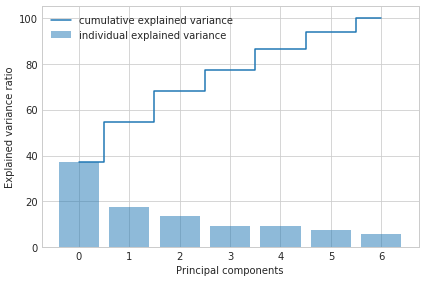

In [16]:
plt.figure()
with plt.style.context('seaborn-whitegrid'):
    plt.figure(figsize=(6, 4))
    plt.bar(range(7), var_exp, alpha=0.5, align='center',
            label='individual explained variance')
    plt.step(range(7), cum_var_exp, where='mid',
             label='cumulative explained variance')
    plt.ylabel('Explained variance ratio')
    plt.xlabel('Principal components')
    plt.legend(loc='best')
    plt.tight_layout()
plt.show()

## pca and principal value scatter matrix


In [17]:
from sklearn.decomposition import PCA as sklearnPCA
sklearn_pca = skalearnPCA(n_components=4)
Y_sklearn = sklearn_pca.fit_transform(possesor_dataset_scaled)


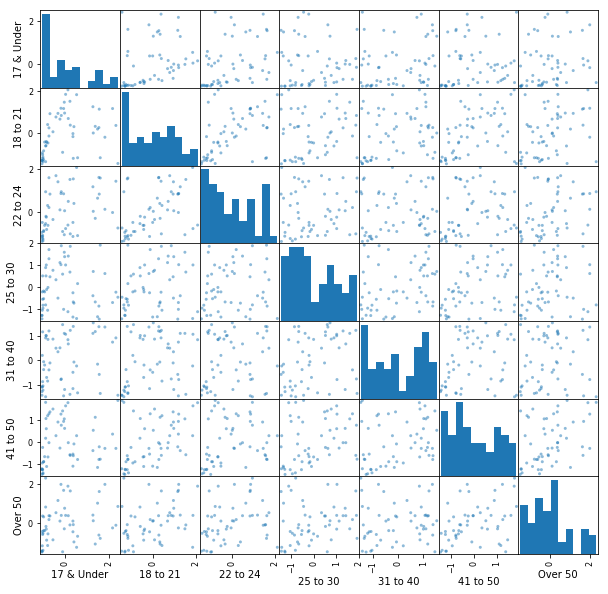

In [18]:
pos_pcaed = pd.DataFrame(Y_sklearn, columns=['pc1', 'pc2', 'pc3', 'pc4'])
scatter_matrix(possesor_dataset_scaled,figsize=(10,10))
plt.show()

In [19]:
pos_pcaed.corr()

,pc1,pc2,pc3,pc4
pc1,1.000000e+00,1.865019e-16,2.630360e-17,2.045961e-17
pc2,1.865019e-16,1.000000e+00,-1.418122e-16,1.104625e-16
pc3,2.630360e-17,-1.418122e-16,1.000000e+00,2.589224e-16
pc4,2.045961e-17,1.104625e-16,2.589224e-16,1.000000e+00


## feature engineering last column 

In [20]:
possesor_dataset['Over 50']
class_ranges= list(range(0,350,50))
for i in range(len(class_ranges)-1): 
    ranged_values_locs  = np.where((possesor_dataset['Over 50']>= class_ranges[i]) & (possesor_dataset['Over 50'] < class_ranges[i+1]))  
    possesor_dataset['Over 50'].values[ranged_values_locs] =i+1
       

In [21]:
possesor_dataset

,17 & Under,18 to 21,22 to 24,25 to 30,31 to 40,41 to 50,Over 50
3,79,150,138,213,181,103,3
4,12,60,87,146,209,179,2
5,104,229,254,2,108,125,1
6,33,106,76,165,197,209,1
7,228,1,47,74,11,236,4
8,107,20,21,120,19,50,2
9,8,72,56,92,111,59,2
10,54,148,109,191,168,86,3
11,94,18,215,58,239,62,2
12,71,230,45,183,213,219,3


## Decision tree on the dataset 

In [22]:
from sklearn import tree
y = possesor_dataset['Over 50'].values
X = possesor_dataset.drop(['Over 50'], axis= 1)
X = X.values
train_range = 40
X_train =X[0:train_range,:]
y_train= y[0:train_range]

In [23]:
clf = tree.DecisionTreeClassifier()
clf = clf.fit(X_train, y_train)
test_range = train_range +1 
predictions = clf.predict_proba(X[test_range:-1,:])
predicted_indices = np.where(predictions==1)
predicted_indices = predicted_indices[1]+1

In [27]:
# calcuating the accuracy 
np.sum(y[test_range:-1]== predicted_indices)/predicted_indices.shape[0]

0.33333333333333331

In [25]:
predicted_indices

array([2, 1, 2, 3, 1, 1, 3, 1, 1, 1, 2, 2], dtype=int64)

In [26]:
y[test_range:-1]

array([1, 1, 3, 2, 5, 1, 3, 2, 2, 5, 2, 3], dtype=uint8)

Of course the accuracy is not going to be that good. Since you are only using 40 data points really. But the workflow is clear. I guess the whole of pca approach isnt particularly useful here since none of the features are correlated as such. One can perhaps read that off from the correlation matrix as much. 